<img src="https://cybersecurity-excellence-awards.com/wp-content/uploads/2017/06/366812.png">

<h1><center>Darwin Supervised Regression Model Building </center></h1>

# Prior to getting started:

First, 
<br>if you have just received a new api key from support, you will need to register your key and create a new user (see Register user cell)

Second, in the Environment Variables cell: 
1. Set your username and password to ensure that you're able to log in successfully
2. Set the path to the location of your datasets if you are using your own data.  The path is set for the examples.
3. Set the dataset names accordingly

Here are a few things to be mindful of:
1. For every run, check the job status (i.e. requested, failed, running, completed) and wait for job to complete before proceeding. 
2. If you're not satisfied with your model and think that Darwin can benefit from extra training, use the resume function.

## Set Darwin SDK

In [1]:
from amb_sdk.sdk import DarwinSdk
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')

(True, 'https://amb-demo-api.sparkcognition.com/v1/')

## Environment Variables

In [2]:
#Set your user id and password accordingly
USER="nsusanward@gmail.com"
PW="G8adjr4PCu"

# Set path to datasets - The default below assumes Jupyter was started from amb-sdk/examples/Enterprise/
# Modify accordingly if you wish to use your own data
PATH_TO_DATASET='./'
DATASET_NAME='drop99.csv'

# A timestamp is used to create a unique name in the event you execute the workflow multiple times or with 
# different datasets.  File names must be unique in Darwin.
import datetime
ts = '{:%Y%m%d%H%M%S}'.format(datetime.datetime.now())


## Import necessary libraries

In [3]:
# Import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import r2_score

# User Login 

In [4]:
status, msg = ds.auth_login_user(USER,PW)
if not status:
    print(msg)

# Data Upload

**Read dataset and view a file snippet**

In [5]:
# Preview dataset
df = pd.read_csv(os.path.join(PATH_TO_DATASET, DATASET_NAME))
#print(df)
print(len(df))
#df.head()
#print(np.any(np.isnan(df['percSOV'])))
#df = df.dropna(subset=['percSOV'])
#print(len(df))


15865


**Upload dataset to Darwin**

In [6]:
# Upload dataset
status, dataset = ds.upload_dataset(DATASET_NAME)
if not status:
    print(dataset)

400: BAD REQUEST - {"message": "Dataset already exists"}



**Clean dataset**

In [7]:
# clean dataset
target = "percSOV"
status, job_id = ds.clean_data(DATASET_NAME, target = target)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-09T17:17:58.328326', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['drop99.csv'], 'artifact_names': ['7f09e7f4683f442a90fa0796efbd1d03'], 'model_name': None, 'job_error': None}
{'status': 'Requested', 'starttime': '2019-04-09T17:17:58.328326', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['drop99.csv'], 'artifact_names': ['7f09e7f4683f442a90fa0796efbd1d03'], 'model_name': None, 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-09T17:17:58.328326', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['drop99.csv'], 'artifact_names': ['7f09e7f4683f442a90fa0796efbd1d03'], 'model_name': None, 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-09T17:17:58.328326', 'endtime': '2019-04-09T17:18:33.198628', 

# Create and Train Model 

We will now build a model that will learn the class labels in the target column.<br> In the default boston dataset, the target column is "Assessed_Value". <br> You will have to specify your own target name for your custom dataset. <br> You can also increase max_train_time for longer training.


In [8]:
model = target + "_model99drop" + ts
status, job_id = ds.create_model(dataset_names = DATASET_NAME, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-09T17:18:44.722548', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['drop99.csv'], 'artifact_names': None, 'model_name': 'percSOV_model99drop20190409171752', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-09T17:18:44.722548', 'endtime': None, 'percent_complete': 4, 'job_type': 'TrainModel', 'loss': 0.4872835576534271, 'generations': 0, 'dataset_names': ['drop99.csv'], 'artifact_names': None, 'model_name': 'percSOV_model99drop20190409171752', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-09T17:18:44.722548', 'endtime': None, 'percent_complete': 14, 'job_type': 'TrainModel', 'loss': 0.4872835576534271, 'generations': 1, 'dataset_names': ['drop99.csv'], 'artifact_names': None, 'model_name': 'percSOV_model99drop20190409171752', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-09T17:18:44.722548', 'endtime': None, 'percent_complete': 2

# Extra Training (Optional)
Run the following cell for extra training, no need to specify parameters

In [9]:
# Train some more
status, job_id = ds.resume_training_model(dataset_names = DATASET_NAME,
                                          model_name = model,
                                          max_train_time = '00:05')
                                          
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-09T17:21:16.692532', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.4872835576534271, 'generations': 2, 'dataset_names': ['drop99.csv'], 'artifact_names': None, 'model_name': 'percSOV_model99drop20190409171752', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-09T17:21:16.692532', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.4872835576534271, 'generations': 2, 'dataset_names': ['drop99.csv'], 'artifact_names': None, 'model_name': 'percSOV_model99drop20190409171752', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-09T17:21:16.692532', 'endtime': None, 'percent_complete': 3, 'job_type': 'UpdateModel', 'loss': 0.4872835576534271, 'generations': 4, 'dataset_names': ['drop99.csv'], 'artifact_names': None, 'model_name': 'percSOV_model99drop20190409171752', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-09T17:21:16.692532', 'endtime': None, 'perc

# Analyze Model
Analyze model provides feature importance ranked by the model. <br> It indicates a general view of which features pose a bigger impact on the model

In [10]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-09T17:25:49.142546', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.4757992923259735, 'generations': 7, 'dataset_names': None, 'artifact_names': ['31b65bd79a6a4e4e8c3f5eae19171cf9'], 'model_name': 'percSOV_model99drop20190409171752', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-09T17:25:49.142546', 'endtime': '2019-04-09T17:26:02.540544', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.4757992923259735, 'generations': 7, 'dataset_names': None, 'artifact_names': ['31b65bd79a6a4e4e8c3f5eae19171cf9'], 'model_name': 'percSOV_model99drop20190409171752', 'job_error': ''}


Show the 10 most important features of the model.

In [26]:
feature_importance[:10]

D4d             0.347963
PCT_AO0         0.134442
D5cr            0.063304
P_WRKAGE        0.048438
PCT_AO2P        0.044781
D5cei           0.040793
D5br            0.021138
D1D             0.020834
D4b050          0.018929
Unnamed: 0.1    0.018856
dtype: float64

# Predictions
**Perform model prediction on the the training dataset.**

In [12]:
status, artifact = ds.run_model(DATASET_NAME, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-09T17:26:06.902707', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.4757992923259735, 'generations': 7, 'dataset_names': ['drop99.csv'], 'artifact_names': ['e433db35ed83469e93408eb51684f752'], 'model_name': 'percSOV_model99drop20190409171752', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-09T17:26:06.902707', 'endtime': '2019-04-09T17:26:16.278759', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.4757992923259735, 'generations': 7, 'dataset_names': ['drop99.csv'], 'artifact_names': ['e433db35ed83469e93408eb51684f752'], 'model_name': 'percSOV_model99drop20190409171752', 'job_error': ''}


(True, 'Job completed')

Download predictions from Darwin's server.

In [15]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
print(len(df[target]))
print(len(prediction[target]))


15865
15865


Create plots comparing predictions with actual target

R^2 :  0.7574748476685346


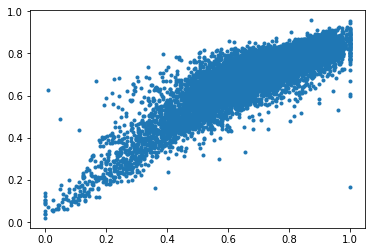

In [16]:
#Plot predictions vs actual
plt.plot(df[target], prediction[target], '.')
#plt.plot([0,2.3e7],[0,2.3e7],'--k')
print('R^2 : ', r2_score(df[target], prediction[target]))

## Find out which machine learning model did Darwin use:

In [17]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

{'type': 'XGBRegressor', 'parameters': {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.035162324539162536, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 19, 'n_estimators': 354, 'n_jobs': -1, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.9291409896064116}}


In [23]:
for col in df.columns:
    print(col)
    count9s = 0
    for row in df[col]:
        if row == -99999:
            count9s+=1
    print(count9s)

Unnamed: 0
0
Unnamed: 0.1
0
Geo_FIPS
0
percSOV
0
GEOID10
0
P_WRKAGE
0
PCT_AO0
0
PCT_AO1
0
PCT_AO2P
0
R_PCTLOWWAGE
0
E5_RET10
0
E5_OFF10
0
E5_IND10
0
E5_SVC10
0
E5_ENT10
0
E8_RET10
0
E8_OFF10
0
E8_IND10
0
E8_SVC10
0
E8_ENT10
0
E8_ED10
0
E8_HLTH10
0
E8_PUB10
0
E_PCTLOWWA
0
D1A
0
D1B
0
D1C
0
D1C5_Ret10
0
D1C5_Off10
0
D1C5_Ind10
0
D1C5_Svc10
0
D1C5_Ent10
0
D1C8_Ret10
0
D1C8_Off10
0
D1C8_Ind10
0
D1C8_Svc10
0
D1C8_Ent10
0
D1C8_Ed10
0
D1C8_Hlth10
0
D1C8_Pub10
0
D1D
0
D1_flag
0
D2A_JPHH
0
D2B_E5MIX
0
D2B_E5MIXA
0
D2B_E8MIX
0
D2B_E8MIXA
0
D2A_EPHHM
0
D2C_TRPMX1
0
D2C_TRPMX2
0
D2C_TRIPEQ
0
D2R_JOBPOP
0
D2R_WRKEMP
0
D2A_WRKEMP
0
D2C_WREMIX
0
D3a
0
D3aao
0
D3amm
0
D3apo
0
D3b
0
D3bao
0
D3bmm3
0
D3bmm4
0
D3bpo3
0
D3bpo4
0
D4a
0
D4b025
0
D4b050
0
D4c
19
D4d
19
D5ar
0
D5ae
0
D5br
96
D5br_Flag
0
D5be
96
D5be_Flag
0
D5cr
0
D5cri
0
D5ce
40
D5cei
0
D5dr
96
D5dri
96
D5de
96
D5dei
96
